# Reducing the data set width


Reducing the data set width comes in two flavors:
  1. Feature Selection - Selecting from existing features
  1. Dimensionality Reduction - Using numerical methods to alter the feature space from known variables to computed variables


## Feature selection
----
If you are dealing with multivariate data, the data usually contains many variables. Not all features are equally significant. You will be able to make better predictions using the minimum possible number of features from the dataset.  When the dataset is huge, computation time matters a great deal. Building models with a minimum number of features helps to reduce the computational effort required. 

Feature selection acts like a filter, eliminating features that aren’t useful. It helps in building predictive models that are free from correlated variables, biases, and unwanted noise.  You might be interested in knowing which features of your data provide the most information about the target variable of interest. 

For example, suppose we’d like to predict iris species using the variables contained in R's iris dataset.

In [1]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Which of the above four features provides the “purest” segmentation with respect to the target? Or put differently, if you were to place a bet on the correct species and could only ask for the value of one feature, which feature would give you the greatest likelihood of winning your bet?

### Filter Methods: 

These methods apply a statistical measure and assign a score to each feature. The features are selected to be kept or removed from the dataset. The methods are often univariate or with regard to the dependent variable. Some of the  methods that fall into this category include the Chi squared test, information gain, and correlation coefficient scores. 

-----

* **Chi squared test:** The chi square / goodness of fit test will check whether significant differences occur within a single category in a categorical variable. We can know the distribution of a variable; if values are equally distributed among different categories then the variable is not providing any new information.
    
Let's see how it works on iris data. 

syntax: chisq.test(x, p)

- x: a numeric vector
- p: a vector of probabilities of the same length of x.

In [2]:
observed = c(50, 50, 50)        # observed frequencies
expected = c(0.333333333333333,0.333333333333333,0.333333333333333)      # expected proportions

chisq.test(x = observed, p = expected)


	Chi-squared test for given probabilities

data:  observed
X-squared = 1.4843e-28, df = 2, p-value = 1


The p-value of the test is 1, which is greater than the significance level alpha = 0.05. We can conclude that the observed proportions are not significantly different from the expected proportions.

----

<b>Entropy: </b> 

**A helpful video explaining entropy: https://www.youtube.com/watch?v=IPkRVpXtbdY**

Entropy is always a calculation on a vector of categorical variable values.  It is a summation across each of the possible values the vector can take on

1. _i=1_ represents a value within the vector (e.g., # of Republicans in a sample of Missourians)
2. _n_ represents the number of "groups" in the vector (e.g., Republicans _and_ Democrats _and_ Independents in the sample of Missourians)
3. _H_ represents the entropy (i.e., the amount of disorder) present.  A higher _H_ represents greater entropy.


**So to calculcate entropy, first multiply the probability of _each value_ within the vector by the quantity (log_2 multiplied by that probability).  Then sum those calculations together and multiply by -1 (to eliminate the negative sign).**


$$H = -\sum_{i=1}^{n} p_i\log_2 p_i$$

For example in the iris dataset, we have 3 possible values for Species (Setosa, Versicolor, Virginica), each representing $\frac{1}{3}$ of the data. (The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.) Therefore


$$-\Bigg(\frac{1}{3} \log_2 (\frac{1}{3}) + \frac{1}{3} \log_2 (\frac{1}{3}) + \frac{1}{3} \log_2 (\frac{1}{3})\Bigg) = 1.59$$

----

<div style="float:left;width:600px" id="container">
    <div id="leftContainer" style="float:left;width:500px;">
        <p><b>Example:</b> What is the entropy of a group in which all examples belong to the same class?</p>
    </div>
    <div id="rightContainer" style="float:right;width:100px;">
        <img src="../images/minimum_entropy.PNG" align="center"/>
    </div>
</div>

    entropy = 
   $$- (1\ *\ log_2(1)) = 0$$

The entropy for this dataset is 0, so it is not a good training set for learning...

<div style="float:left;width:600px" id="container">
    <div id="leftContainer" style="float:left;width:500px;">
        <p><b> Example:</b> What is the entropy of a group with 50% in either class?</p>
    </div>
    <div id="rightContainer" style="float:right;width:100px;">
        <img src="../images/maximum_entropy.PNG" align="center"/>
    </div>
</div>

    Entropy = 
    
$$-(0.5\ *\ log_2(0.5)\ +\ 0.5\ *\ log_2(0.5)) = 1$$
    
This is a good training set for learning...

----
<b>Information gain: </b>

<span style="color:#4286f4; font-weight: bold">Information Gain</span> = <span style="color:#e57f2b; font-weight: bold">Parent Entropy – Weighted Average Entropy of Children</span>


Information gain helps in making two important decisions when building decision trees on data. What is the best split(s) and which is the best variable to split a node.

Along a similar line, we want to determine which attribute in a given set of training feature vectors is most useful for discriminating between the classes to be learned.

    - Information gain tells us the importance of a given attribute of the feature vectors.
    - We will use it to decide the ordering of attributes.
    
Consider following data with 30 elements of which 16 elements are green circles and remaining 14 are pink crosses. 

<img src="../images/circles_and_crosses.PNG">


Subset 1 Child entropy =  $-\Bigg(\frac{13}{17} \log_2 (\frac{13}{17}) + \frac{4}{17} \log_2 (\frac{4}{17})\Bigg) = 0.787$

Subset 2 Child entropy =  $-\Bigg(\frac{1}{13} \log_2 (\frac{1}{13}) + \frac{12}{13} \log_2 (\frac{12}{13})\Bigg) = 0.391$

Parent entropy =  $-\Bigg(\frac{16}{30} \log_2 (\frac{16}{30}) + \frac{14}{30} \log_2 (\frac{14}{30})\Bigg) = 0.996$

Weighted Average Entropy of Children = $\Bigg(\frac{17}{30} * 0.787 \Bigg) + \Bigg(\frac{13}{30} * 0.391 \Bigg) = 0.615$

    
    Information Gain for this split = 0.996 - 0.615 = 0.38 

### Wrapper Methods: 

Wrapper methods use a subset of features and train a model using them. Based on the results drawn from the previous model, features are either added or removed from the subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

Some common examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc.

**Forward Selection:** Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model until the addition of a new variable does not improve the performance of the model.

**Backward Elimination:** In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

**Recursive Feature elimination:** It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the features left until all the features are exhausted. It then ranks the features based on the order of their elimination.

Read more about Recursive Feature Elimination implementation in the caret package. 

[Feature selection using Caret package](https://www.r-bloggers.com/feature-selection-with-carets-genetic-algorithm-option/)

## Dimensionality Reduction
-----

Let's continue the discussion with the communities and crime dataset. 
The data is socio-economic data with a total of 1994 instances and 128 features. 
Out of the 128 variables, 122 are predictive, 5 are non-predictive and one variable is a target variable. 
The first five variables are non predictive so we don't have to consider them when building the model.

The dataset has missing values. 
The per-capita violent crimes variable was calculated using population and the sum of crime variables considered violent crimes in the United States-- namely murder, rape, robbery, and assault. 
There was apparently some controversy in some states concerning the counting of rapes. 
These resulted in missing values for rape, which resulted in incorrect values for per capita violent crime. 
These cities are not included in the dataset. 

Missing values should be treated before building any models. 
All numeric data is normalized into the decimal range 0.00-1.00 using an unsupervised, equal-interval binning method. 
Read the description about the dataset by opening a terminal and running this command:

```Bash
less /dsa/data/all_datasets/crime/readme.txt
```

The actual data doesn't have any column headers. 
You need to grab the headers information from the readme file. 
We have to do a little bit of data carpentry before we can start using the data to apply linear regression on it.

The headers information is present in readme file. 
Keep this information in a separate file called names.txt so we can access only the part of data we are interetsed in. The headers data in names.txt has so much unwanted information.
A sample record is shown below

    '-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)'

The only thing we are interested in is the first word in every line, which is the actual column name. 
So read the data separating every word using the parameter sep="". 
Header will be FALSE, because we don't have the header in the actual data file. 

In [3]:
column_names = read.csv('/dsa/data/all_datasets/crime/names.txt', header = FALSE, sep="")
head(column_names)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
--,state:,US,state,(by,number),-,not,counted,as,predictive,"above,",but,if,"considered,",should,be,consided,nominal,(nominal)
--,county:,numeric,code,for,county,-,not,"predictive,",and,many,missing,values,(numeric),,,,,,
--,community:,numeric,code,for,community,-,not,predictive,and,many,missing,values,(numeric),,,,,,
--,communityname:,community,name,-,not,predictive,-,for,information,only,(string),,,,,,,,
--,fold:,fold,number,for,non-random,10,fold,cross,"validation,",potentially,useful,for,"debugging,",paired,tests,-,not,predictive,(numeric)
--,population:,population,for,community:,(numeric,-,decimal),,,,,,,,,,,,


Attribute names are extracted but they still need some cleaning. Every attribute name has a ':' appended at the end. Get rid of the ':' from every word using gsub() function. It will replace characters in a string.

In [4]:
# Attribute names are in 2nd column. Extract them. 
column_names = column_names[,2]

# The first argument to gsub() ':' is replaced with second argument ''(nothing here) from every string in names.
column_names = gsub(':','', column_names)
head(column_names)

[1] "state"         "county"        "community"     "communityname"
[5] "fold"          "population"

We are all set to assign these names to crime dataset.

**Note** Error expected!

In [5]:
# Uncomment the lines of code below and run it.
crime_data <- read.csv('/dsa/data/all_datasets/crime/communities_and_crime.txt',header=FALSE)
names(crime_data)=column_names

ERROR: Error in names(crime_data) = column_names: 'names' attribute [132] must be the same length as the vector [128]


### Error
-----


The error is saying something about the lengths of vector column_names and names() attribute. Check the lengths of column_names vector and number of columns in crime_data dataset.

In [6]:
ncol(crime_data)
length(column_names)

[1] 128

[1] 132

We hope you understand what is happening here. There are 132 names in column_names vector which we are trying to assign to 128 columns/variables in crime_data dataframe. Some how we ended up extracting 132 names instead of 128. If we observe the names vector closely we can see what are those extra names.

In [7]:
column_names

[1] "state"                 "county"                "community"            
  [4] "communityname"         "fold"                  "population"           
  [7] "householdsize"         "racepctblack"          "racePctWhite"         
 [10] "racePctAsian"          "racePctHisp"           "agePct12t21"          
 [13] "agePct12t29"           "agePct16t24"           "agePct65up"           
 [16] "numbUrban"             "pctUrban"              "medIncome"            
 [19] "pctWWage"              "pctWFarmSelf"          "pctWInvInc"           
 [22] "pctWSocSec"            "pctWPubAsst"           "pctWRetire"           
 [25] "medFamInc"             "perCapInc"             "whitePerCap"          
 [28] "blackPerCap"           "indianPerCap"          "AsianPerCap"          
 [31] "OtherPerCap"           "HispPerCap"            "NumUnderPov"          
 [34] "PctPopUnderPov"        "PctLess9thGrade"       "PctNotHSGrad"         
 [37] "PctBSorMore"           "PctUnemployed"         "PctEmploy"            
 [40] "PctEmplManu"           "PctEmplProfServ"       "PctOccupManu"         
 [43] "PctOccupMgmtProf"      "MalePctDivorce"        "MalePctNevMarr"       
 [46] "FemalePctDiv"          "TotalPctDiv"           "PersPerFam"           
 [49] "PctFam2Par"            "PctKids2Par"           "PctYoungKids2Par"     
 [52] "PctTeen2Par"           "PctWorkMomYoungKids"   "PctWorkMom"           
 [55] "NumIlleg"              "PctIlleg"              "NumImmig"             
 [58] "PctImmigRecent"        "PctImmigRec5"          "PctImmigRec8"         
 [61] "PctImmigRec10"         "PctRecentImmig"        "PctRecImmig5"         
 [64] "PctRecImmig8"          "PctRecImmig10"         "PctSpeakEnglOnly"     
 [67] "PctNotSpeakEnglWell"   "PctLargHouseFam"       "PctLargHouseOccup"    
 [70] "PersPerOccupHous"      "PersPerOwnOccHous"     "PersPerRentOccHous"   
 [73] "PctPersOwnOccup"       "PctPersDenseHous"      "PctHousLess3BR"       
 [76] "MedNumBR"              "HousVacant"            "PctHousOccup"         
 [79] "PctHousOwnOcc"         "PctVacantBoarded"      "PctVacMore6Mos"       
 [82] "MedYrHousBuilt"        "PctHousNoPhone"        "PctWOFullPlumb"       
 [85] "OwnOccLowQuart"        "OwnOccMedVal"          "OwnOccHiQuart"        
 [88] "RentLowQ"              "RentMedian"            "RentHighQ"            
 [91] "MedRent"               "MedRentPctHousInc"     "MedOwnCostPctInc"     
 [94] "MedOwnCostPctIncNoMtg" "NumInShelters"         "NumStreet"            
 [97] "PctForeignBorn"        "PctBornSameState"      "PctSameHouse85"       
[100] "PctSameCity85"         "PctSameState85"        "LemasSwornFT"         
[103] "LemasSwFTPerPop"       "LemasSwFTFieldOps"     "-"                    
[106] "LemasSwFTFieldPerPop"  "(numeric"              "LemasTotalReq"        
[109] "LemasTotReqPerPop"     "PolicReqPerOffic"      "PolicPerPop"          
[112] "RacialMatchCommPol"    "and"                   "PctPolicWhite"        
[115] "PctPolicBlack"         "PctPolicHisp"          "PctPolicAsian"        
[118] "PctPolicMinor"         "OfficAssgnDrugUnits"   "NumKindsDrugsSeiz"    
[121] "PolicAveOTWorked"      "LandArea"              "PopDens"              
[124] "PctUsePubTrans"        "PolicCars"             "PolicOperBudg"        
[127] "LemasPctPolicOnPatr"   "LemasGangUnitDeploy"   "Part"                 
[130] "LemasPctOfficDrugUn"   "PolicBudgPerPop"       "ViolentCrimesPerPop"

"-", "and", "(numeric", "Part" are the four names that were created that are not actual column names. Once we eliminate these we should be good to go.

In [8]:
# In the below command, we are using the negation operator ('!') to select strings in the names vector which 
# are not in the specified list 
column_names = column_names [! column_names %in% c('-', 'and', '(numeric', 'Part')]
length(column_names)

[1] 128

Now that we have names for our columns in actual crime_data, let's assign them.

In [9]:
names(crime_data) = column_names
head(crime_data)

state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,⋯,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,⋯,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,⋯,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,⋯,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,⋯,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,⋯,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14


### Splitting the data into train and test sets

#### How will you check the accuracy or how good is the fit of your model?

You cannot build and test the model on the same data. Doing so is meaningless. You have to test the accuracy of the model on unknown test data. R has libraries to split the data into train and test datasets. 

Split the dataset into training and testing datasets. We can do this using the caTools package, as shown below.

In [12]:
library(devtools)
packageurl <- "https://cran.r-project.org/src/contrib/Archive/caTools/caTools_1.16.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
library(caTools)

In [13]:
# set.seed() is used return a reproducible sample. It helps to split the data in the same, equal partitions 
# no matter how many times it's split.
set.seed(144)

# install.packages("caTools",repo="http://cran.uk.r-project.org")

library(caTools)

split = sample.split(crime_data$ViolentCrimesPerPop, SplitRatio = 0.7)

crime_train_data = subset(crime_data, split == TRUE)

crime_test_data = subset(crime_data, split == FALSE)

nrow(crime_train_data)
nrow(crime_test_data)

[1] 1397

[1] 597

In [14]:
head(crime_test_data)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
,<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
5,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,⋯,0.04,0.09,0.02,?,?,?,?,0,?,0.03
8,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,⋯,0.01,0.33,0.00,?,?,?,?,0,?,0.55
9,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,⋯,0.04,0.17,0.04,?,?,?,?,0,?,0.53
11,6,?,?,DalyCitycity,1,0.13,0.71,0.15,0.07,1.00,⋯,0.02,1.00,1.00,?,?,?,?,0,?,0.24
12,36,?,?,RockvilleCentrevillage,1,0.02,0.46,0.08,0.91,0.07,⋯,0.01,0.63,1.00,?,?,?,?,0,?,0.08
15,6,?,?,DanaPointcity,1,0.04,0.36,0.01,0.85,0.14,⋯,0.02,0.40,0.15,?,?,?,?,0,?,0.21


Dimensionality reduction is not the same as feature selection. Even though both try to reduce the number of attributes in the dataset, dimensionality reduction methods create new combinations of attributes, whereas the feature selection method includes and excludes attributes present in the data without altering them. Principal Component Analysis, Singular Value Decomposition, Factor Analysis and Sammon’s Mapping, etc. are all examples of dimensionality reduction.

Here are some of the simplest of techniques for dimensionality reduction/variable exclusion...

**Missing Values Ratio:** Columns with many missing values carry less useful information. Thus, if the number of missing values in a column is greater than a threshold value it can be removed.

**Low Variance Filter:** Columns with little variance in data carry little information. Thus, if the number of values in a column is less than a threshold value it can be removed. Variance is range dependent. Therefore, data should be normalized before applying this technique.

**High Correlation Filter:** Columns with high correletion provide almost the same information. One of them is enough to feed data to the model. Correlation is scale sensitive. So, column normalization should be done for a meaningful correlation comparison.

**Random Forests / Ensemble Trees:**. Decision Tree Ensembles or random forests are useful for feature selection as well as data classification. Trees are constructed with attributes as nodes. If an attribute is selected as best split, it is likely to be the most informative feature of dataset.

**Principal Component Analysis (PCA):**. Principal Component Analysis (PCA) is a statistical technique takes n features of the dataset to transform into a new set of n coordinates called principal components. The transformation helps the first principal component to explain the largest possible variance. The components following have the next highest possible variance without any correletion with other components.
[Additional Reading](https://www.r-bloggers.com/principal-component-analysis-using-r/)


In [15]:
summary(crime_train_data)

     state           county      community            communityname 
 Min.   : 1.00   ?      :817   ?      :820   Albanycity      :   4  
 1st Qu.:12.00   3      : 55   1000   :  2   Athenscity      :   4  
 Median :34.00   17     : 42   11000  :  2   Greenvillecity  :   4  
 Mean   :28.71   9      : 31   21000  :  2   Jacksonvillecity:   4  
 3rd Qu.:42.00   1      : 29   21344  :  2   Ashlandcity     :   3  
 Max.   :56.00   5      : 29   52980  :  2   Columbiacity    :   3  
                 (Other):394   (Other):567   (Other)         :1375  
      fold          population      householdsize    racepctblack   
 Min.   : 1.000   Min.   :0.00000   Min.   :0.000   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:0.01000   1st Qu.:0.350   1st Qu.:0.0200  
 Median : 6.000   Median :0.02000   Median :0.430   Median :0.0600  
 Mean   : 5.493   Mean   :0.05571   Mean   :0.459   Mean   :0.1828  
 3rd Qu.: 8.000   3rd Qu.:0.05000   3rd Qu.:0.530   3rd Qu.:0.2400  
 Max.   :10.000   Max.   :1.00000 

In [16]:
table(crime_train_data$LemasSwFTFieldPerPop == '?')
table(is.na(crime_train_data$LemasSwFTFieldPerPop))


FALSE  TRUE 
  223  1174 


FALSE 
 1397 

There are many variables who have missing values filled with `?`. 

In [17]:
head(crime_train_data)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
,<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,⋯,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
2,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,⋯,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
3,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,⋯,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
4,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,⋯,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
6,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,⋯,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
7,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,⋯,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03


### PCA

Simple explanation of PCA: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues


##### Centering and Standardizing Variables

Principal Component Analysis in R: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/#biplot


Standardizing the variables is very important if we have to perform principal component analysis on the variables. 
If the variables are not standardized, then variables with large variances dominate other variables.

When the variables are standardized, they will all have variance 1 and mean 0. This would allow us to find the principal components that provide the best low-dimensional representation of the variation in the original data, without being overly biased by those variables that show the most variance in the original data.

We will use `scale()` function In R to standardize the variables.

In [18]:
standard_vars <- as.data.frame(scale(crime_train_data[!sapply(crime_train_data,class) %in% c('factor')]))
dim(standard_vars)
head(standard_vars)

# It is also possible to normalize all the varibles by specifying "center" and "scale." arguments
# in the prcomp() function.  Do this by specifying that "center = TRUE" and "scale. = TRUE".

[1] 1397  102

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,⋯,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.2642244,-1.555965,1.1118149,-0.8071730,-0.6352198,0.59663290,-0.15684331,0.1378421,-0.5283337,-0.16108379,⋯,-0.406078890,-0.9221931,-0.19867356,-0.57541145,-0.055416321,0.5254673,0.1199221,0.1584699,0.9342996,-0.1637899
2,1.4831299,-1.555965,-0.4612609,-1.8704940,-0.2451358,-0.05753852,1.42951768,-0.3002048,-1.0336531,0.65921044,⋯,-0.007139221,-0.5317684,-1.07681306,-0.13064026,-0.658662555,-0.4021013,-0.5624861,1.2396504,-0.3890719,1.8542770
3,-0.2873873,-1.555965,-0.4612609,-0.2442383,1.1981749,-0.79348137,0.08351442,-0.4316188,-0.2125091,-0.16108379,⋯,-0.317425631,-0.5805715,0.02086131,0.21529289,-0.457580477,-0.4948582,-0.1237951,-0.6199800,-0.3890719,0.8237748
4,0.3231359,-1.555965,-0.1300871,1.9449520,3.1876030,-2.75599563,-0.15684331,-0.1687907,0.5454700,0.04398977,⋯,-0.095792481,-1.5078300,1.06365197,0.06703582,-0.005145801,-0.4021013,0.7535869,0.5044477,-0.3890719,-0.5072906
6,-1.3863290,-1.555965,-0.2956740,-1.1199145,-0.4791862,-0.87525279,4.07345265,0.4882796,-0.7178285,-0.09272593,⋯,2.164865646,-0.9221931,-0.25355728,0.51180701,-0.055416321,-0.4948582,1.6797123,-0.2740022,-0.3890719,-0.4214154
7,0.9336591,-1.555965,-0.3784675,-0.4318832,-0.7132365,0.92371861,-0.44527258,-0.5192282,-0.7809934,-0.84466231,⋯,-0.273099001,0.9811271,1.28318685,1.40134940,0.949994069,-0.1238307,-0.7574599,-0.4469911,-0.3890719,-0.8937289


You can verify the means and standard deviations of the variables. The means will be nearly equal to zero and all standard deviations will equal 1.

In [19]:
sapply(standard_vars,mean)

state                  fold            population 
         9.611169e-17         -7.299669e-17         -1.060314e-17 
        householdsize          racepctblack          racePctWhite 
         9.580700e-17         -3.140042e-17         -4.400650e-17 
         racePctAsian           racePctHisp           agePct12t21 
        -3.698288e-17         -3.177605e-17          4.199269e-17 
          agePct12t29           agePct16t24            agePct65up 
         9.038024e-17          1.330038e-16          3.919969e-17 
            numbUrban              pctUrban             medIncome 
        -1.514833e-17          1.146362e-16          1.115981e-16 
             pctWWage          pctWFarmSelf            pctWInvInc 
         3.006600e-16          4.688470e-17          7.582904e-17 
           pctWSocSec           pctWPubAsst            pctWRetire 
        -8.430405e-17         -1.018374e-17          4.253557e-17 
            medFamInc             perCapInc           whitePerCap 
        -4.378275e-17         -9.527894e-17          9.082428e-17 
          blackPerCap          indianPerCap           AsianPerCap 
        -1.101144e-16         -6.108367e-17          2.336452e-17 
           HispPerCap           NumUnderPov        PctPopUnderPov 
        -4.027023e-17          2.196980e-17          4.279809e-17 
      PctLess9thGrade          PctNotHSGrad           PctBSorMore 
         1.195284e-16         -1.172120e-16          1.509804e-17 
        PctUnemployed             PctEmploy           PctEmplManu 
         1.885371e-17         -2.527719e-16         -8.259374e-17 
      PctEmplProfServ          PctOccupManu      PctOccupMgmtProf 
         1.170684e-16         -2.912701e-17          9.960799e-17 
       MalePctDivorce        MalePctNevMarr          FemalePctDiv 
         2.339484e-17         -1.253159e-16          1.189223e-16 
          TotalPctDiv            PersPerFam            PctFam2Par 
         1.001726e-16          8.299758e-17          3.956601e-17 
          PctKids2Par      PctYoungKids2Par           PctTeen2Par 
         1.383674e-16          1.958204e-16          8.276818e-17 
  PctWorkMomYoungKids            PctWorkMom              NumIlleg 
         3.251178e-16         -1.208313e-16         -1.148843e-17 
             PctIlleg              NumImmig        PctImmigRecent 
         6.357674e-17          2.865227e-17         -1.051312e-16 
         PctImmigRec5          PctImmigRec8         PctImmigRec10 
         9.920310e-17          1.320305e-17         -3.606311e-17 
       PctRecentImmig          PctRecImmig5          PctRecImmig8 
        -9.136169e-19         -4.217508e-17          5.055471e-19 
        PctRecImmig10      PctSpeakEnglOnly   PctNotSpeakEnglWell 
        -1.957183e-17          2.200333e-17         -1.063496e-17 
      PctLargHouseFam     PctLargHouseOccup      PersPerOccupHous 
        -7.982211e-17         -2.894424e-17         -1.366297e-16 
    PersPerOwnOccHous    PersPerRentOccHous       PctPersOwnOccup 
         1.502243e-16         -1.309044e-16         -3.049751e-17 
     PctPersDenseHous        PctHousLess3BR              MedNumBR 
         1.670929e-17          1.132980e-16          6.493323e-17 
           HousVacant          PctHousOccup         PctHousOwnOcc 
         3.625618e-17          2.257833e-16          1.776362e-16 
     PctVacantBoarded        PctVacMore6Mos        MedYrHousBuilt 
        -2.506529e-17         -9.981668e-17          6.504204e-17 
       PctHousNoPhone        PctWOFullPlumb        OwnOccLowQuart 
         9.072816e-17          2.677541e-17          1.011803e-16 
         OwnOccMedVal         OwnOccHiQuart              RentLowQ 
        -5.864653e-17         -8.066972e-17          1.234943e-16 
           RentMedian             RentHighQ               MedRent 
        -1.375971e-17         -5.774805e-17          5.612597e-17 
    MedRentPctHousInc      MedOwnCostPctInc MedOwnCostPctIncNoMtg 
         1.533892e-16         -1.453649e-16          4.951164e-

In [20]:
sapply(standard_vars,sd)

state                  fold            population 
                    1                     1                     1 
        householdsize          racepctblack          racePctWhite 
                    1                     1                     1 
         racePctAsian           racePctHisp           agePct12t21 
                    1                     1                     1 
          agePct12t29           agePct16t24            agePct65up 
                    1                     1                     1 
            numbUrban              pctUrban             medIncome 
                    1                     1                     1 
             pctWWage          pctWFarmSelf            pctWInvInc 
                    1                     1                     1 
           pctWSocSec           pctWPubAsst            pctWRetire 
                    1                     1                     1 
            medFamInc             perCapInc           whitePerCap 
                    1                     1                     1 
          blackPerCap          indianPerCap           AsianPerCap 
                    1                     1                     1 
           HispPerCap           NumUnderPov        PctPopUnderPov 
                    1                     1                     1 
      PctLess9thGrade          PctNotHSGrad           PctBSorMore 
                    1                     1                     1 
        PctUnemployed             PctEmploy           PctEmplManu 
                    1                     1                     1 
      PctEmplProfServ          PctOccupManu      PctOccupMgmtProf 
                    1                     1                     1 
       MalePctDivorce        MalePctNevMarr          FemalePctDiv 
                    1                     1                     1 
          TotalPctDiv            PersPerFam            PctFam2Par 
                    1                     1                     1 
          PctKids2Par      PctYoungKids2Par           PctTeen2Par 
                    1                     1                     1 
  PctWorkMomYoungKids            PctWorkMom              NumIlleg 
                    1                     1                     1 
             PctIlleg              NumImmig        PctImmigRecent 
                    1                     1                     1 
         PctImmigRec5          PctImmigRec8         PctImmigRec10 
                    1                     1                     1 
       PctRecentImmig          PctRecImmig5          PctRecImmig8 
                    1                     1                     1 
        PctRecImmig10      PctSpeakEnglOnly   PctNotSpeakEnglWell 
                    1                     1                     1 
      PctLargHouseFam     PctLargHouseOccup      PersPerOccupHous 
                    1                     1                     1 
    PersPerOwnOccHous    PersPerRentOccHous       PctPersOwnOccup 
                    1                     1                     1 
     PctPersDenseHous        PctHousLess3BR              MedNumBR 
                    1                     1                     1 
           HousVacant          PctHousOccup         PctHousOwnOcc 
                    1                     1                     1 
     PctVacantBoarded        PctVacMore6Mos        MedYrHousBuilt 
                    1                     1                     1 
       PctHousNoPhone        PctWOFullPlumb        OwnOccLowQuart 
                    1                     1                     1 
         OwnOccMedVal         OwnOccHiQuart              RentLowQ 
                    1                     1                     1 
           RentMedian             RentHighQ               MedRent 
                    1                     1                     1 
    MedRentPctHousInc      MedOwnCostPctInc MedOwnCostPctIncNoMtg 
                    1                     1                    

<span style="color:#ea8d12; font-weight:700">Helpful video for understanding and plotting results from prcomp(): </span>https://www.youtube.com/watch?v=0Jp4gsfOLMs

<span style="color:#ea8d12; font-weight:700">Biplot interpretation (go to 14:05 mark): </span>https://www.youtube.com/watch?v=OowGKNgdowA

<span style="color:#ea8d12; font-weight:700">prcomp() versus princomp(): </span>http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/118-principal-component-analysis-in-r-prcomp-vs-princomp/

In [21]:
help(prcomp)
crime_train_data_pca <- prcomp(standard_vars)

# Note: prcomp() expects the samples to be rows and the variables to be columns.  If that's 
# not the case, you must use the t() function to transpose the matrix.

# prcomp() returns several things: (1) x, (2) sdev, and (3) rotation.  

# Each principal component is a normalized linear combination of original variables.  The rotations 
# (i.e., loadings) are the coefficients of the linear combinations of the continuous variables.

# print(crime_train_data_pca) will return the principal components with the coefficients for each
# continuous variable.  In these returned values, a positive coefficient indicates that as as a 
# particular PC increases, the variable(s) with positive coefficients also increase.  Variables 
# with negative coefficients decrease, relative to the PC. 

In [22]:
summary(crime_train_data_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     5.0445 4.1164 3.03448 2.77353 2.35187 2.05648 1.81915
Proportion of Variance 0.2495 0.1661 0.09027 0.07542 0.05423 0.04146 0.03244
Cumulative Proportion  0.2495 0.4156 0.50588 0.58129 0.63552 0.67698 0.70943
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.74463 1.47464 1.2816 1.25035 1.23379 1.17515 1.03269
Proportion of Variance 0.02984 0.02132 0.0161 0.01533 0.01492 0.01354 0.01046
Cumulative Proportion  0.73927 0.76059 0.7767 0.79202 0.80694 0.82048 0.83093
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.99781 0.95213 0.92494 0.86417 0.83728 0.82164 0.81148
Proportion of Variance 0.00976 0.00889 0.00839 0.00732 0.00687 0.00662 0.00646
Cumulative Proportion  0.84070 0.84958 0.85797 0.86529 0.87217 0.87878 0.88524
                          PC22    PC23

#### Number of Principal Components to Retain

A scree plot helps us to decide on number of principal components to be retained. The plot will summarize the PCA analysis results. The `screeplot()` function in R will help us to do this.

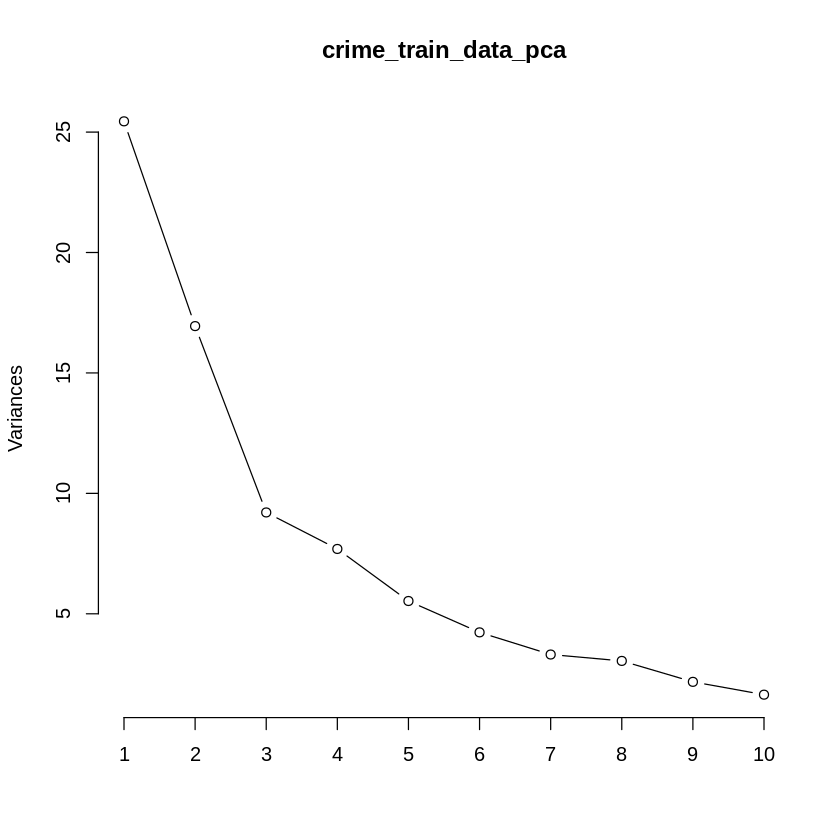

In [23]:
screeplot(crime_train_data_pca, type="lines")

The most obvious change in slope in the scree plot occurs at component 7, therefore first six components should be retained.

Another approach to decide on number of PCA components to choose is by using Kaiser’s criterion. It suggests that we should only retain principal components for which the variance is above 1 (on standardized variables). We can check this by finding the variance of each of the principal components. The standard deviations of PCA components are saved in a standard variable called sdev. You can access it in crime_train_data_pca dataframe.

In [24]:
(crime_train_data_pca$sdev)^2

[1] 2.544651e+01 1.694487e+01 9.208042e+00 7.692496e+00 5.531314e+00
  [6] 4.229116e+00 3.309296e+00 3.043717e+00 2.174571e+00 1.642411e+00
 [11] 1.563370e+00 1.522229e+00 1.380971e+00 1.066441e+00 9.956344e-01
 [16] 9.065574e-01 8.555192e-01 7.467982e-01 7.010342e-01 6.750860e-01
 [21] 6.584918e-01 6.381038e-01 5.868162e-01 5.595806e-01 5.210188e-01
 [26] 4.996138e-01 4.763121e-01 4.658653e-01 4.510405e-01 4.333831e-01
 [31] 3.901848e-01 3.840640e-01 3.660524e-01 3.460079e-01 3.187732e-01
 [36] 3.041540e-01 2.922328e-01 2.597588e-01 2.501818e-01 2.444826e-01
 [41] 2.346080e-01 2.237573e-01 2.126080e-01 2.030724e-01 2.004548e-01
 [46] 1.839492e-01 1.799244e-01 1.686884e-01 1.604103e-01 1.370179e-01
 [51] 1.361949e-01 1.280102e-01 1.069405e-01 1.006399e-01 9.979267e-02
 [56] 9.561350e-02 8.835818e-02 8.254007e-02 7.805146e-02 7.290981e-02
 [61] 6.636534e-02 6.408976e-02 6.280765e-02 6.060223e-02 5.588525e-02
 [66] 5.308123e-02 4.742881e-02 4.603142e-02 4.350595e-02 4.291355e-02
 [71] 3.806477e-02 3.764212e-02 3.563596e-02 3.430543e-02 3.177818e-02
 [76] 2.914116e-02 2.645696e-02 2.507916e-02 2.319420e-02 2.253928e-02
 [81] 2.019976e-02 1.871696e-02 1.768399e-02 1.726570e-02 1.565211e-02
 [86] 1.332646e-02 1.282026e-02 1.151969e-02 8.851315e-03 7.949138e-03
 [91] 5.963077e-03 5.302944e-03 4.902670e-03 3.933848e-03 3.656395e-03
 [96] 2.619965e-03 1.991955e-03 1.864655e-03 1.355102e-03 1.018723e-03
[101] 7.442454e-04 4.744990e-04

The components 1 through 14 have variance above 1. Using Kaiser’s criterion, we can retain the first fourteen principal components.

One more method to decide on number of PCA components to retain is to keep as few components as required to explain at least some minimum amount of the total variance. For example, if you want to explain at least 70% of the variance, we will retain the first eight principal components, as we can see from the output of `summary(crime_train_data_pca)` that the first eight principal components explain 70% of the variance (while the first four components explain 56%).

### Scatter Plots of Principal Components

The values of the principal components are stored in a named element `x` of the variable returned by `prcomp()`. `x` contains a matrix where the first column contains the first principal component, the second column the second component, and so on.

Thus, `housing_prices_pca$x[,1]` contains the first principal component, and `housing_prices_pca$x[,2]` contains the second principal component.

We will make a scatterplot of the first two principal components.

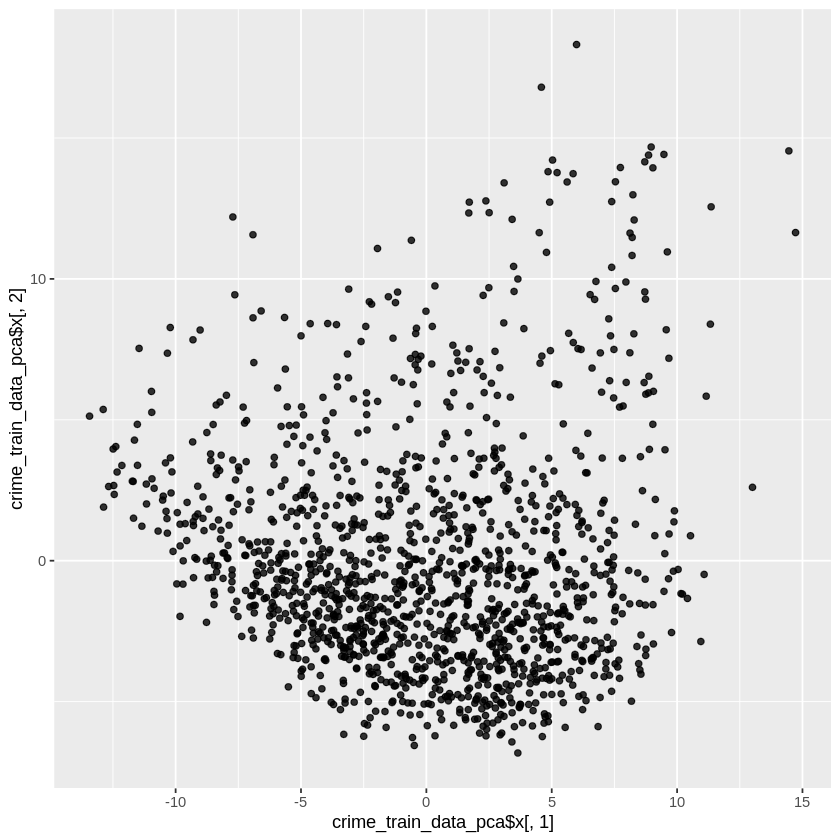

In [25]:
library(ggplot2)
pca_comp1_comp2 <- ggplot(crime_train_data, aes(x=crime_train_data_pca$x[,1],y=crime_train_data_pca$x[,2]))

pca_comp1_comp2+geom_point(alpha = 0.8)

[1] 1397

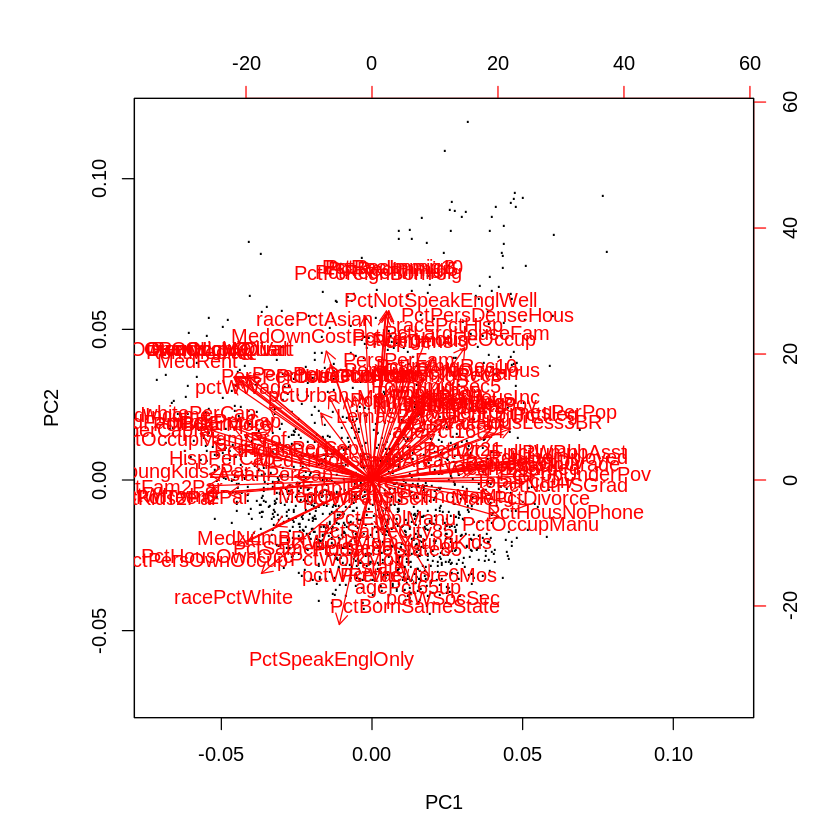

In [26]:
# Calculating total number of elements in the dataset so that we can use this, in the following line of code,
# to replace the principal components values with dots (to differentiate them from the variable coefficients.)

len <- length(as.matrix(crime_train_data)) / length(crime_train_data)

len

biplot(crime_train_data_pca, xlabs = rep('.', len))

# Another option: Could put "nrow(crime_train_data)" in place of "len" in the last line of code.

# rep() replicates the values in x
# xlabs is a vector of character strings used to label the first set of points.  In this case, the xlabs() function 
# is being used simply to differentiate the PC-1 values from the PC-2 values.  

### Factor Analysis


Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. Factor analysis searches for such joint variations in response to unobserved latent variables. The observed variables are modelled as linear combinations of the potential factors, plus “error” terms. The information gained about the interdependencies between observed variables can be used later to reduce the set of variables in a dataset. 

Latent variables (as opposed to observable variables), are variables that are not directly observed but are rather inferred (through a mathematical model) from other variables that are observed (directly measured).  Since factors are latent, we cannot use methods like regression.

The key concept of factor analysis is that multiple observed variables have similar patterns of responses because they are all associated with a latent (i.e. not directly measured) variable. For example, people may respond similarly to questions about income, education, and occupation, which are all associated with the latent variable "socioeconomic status". It is possible that variations in n observed variables reflect the variations in just two unobserved (underlying) variables. Factor analysis searches for such joint variations in response to unobserved latent variables and aims to find independent latent variables.

Factor Analysis is a method for analyzing the covariation among the observed variables to address following questions:

* How many latent factors are needed to account for most of the variation among the observed variables?
* Which variables appear to define each factor; hence what labels should we give to these factors?

Factors are listed according to factor loadings, or how much variation in the data they can explain. 

So, we want to investigate if observable variables (e.g., X1,X2…XN) are linearly related to a small number of unobservable (latent) factors (e.g., F1,F2…FK), with K<<N.

See this link for more information: http://www.di.fc.ul.pt/~jpn/r/factoranalysis/factoranalysis.html

There are the following assumptions:

1. The error terms are independent from each other  
2. The unobservable factors are independent from each other

The second assumption is stating that these latent variables do not influence one another, which might be too strong a condition. There are more advanced models where this is relaxed.

With the loadings it is possible to compute the covariance of any two observed variables as well as the variance of each variable.

The values of the loadings are not unique (in fact, they are infinite). This means that if the algorithm finds one solution that does not reveal the hypothesized structure of the problem, it is possible to apply a ‘rotation’ to find another set of loadings that might provide a better interpretation or more consistent with prior expectations about the dataset.

There are a number of rotations in the literature. For example:

1. Varimax: a rotation that seeks to maximize the variance of the squared loading for each factor (ie, make them as large as possible to capture as most signal as possible)
2. Quartimax : seeks to maximize the variance of the squared loadings for each variable, and tends to produce factors with high loadings for all variables.

Rotation methods can be described as orthogonal, which do not allow the resulting factors to be correlated, and oblique, which do allow the resulting factors to be correlated.

There are two types of factor analysis: exploratory and confirmatory.

##### Exploratory factor analysis
It is done if a researcher doesn’t have any idea about the structure of data or how many dimensions are in a set of variables. It helps identify complex interrelationships among items and group items that are part of unified concepts.

##### Confirmatory Factor Analysis
It is used for verification where the researcher has specific idea about the structure of data or how many dimensions are in a set of variables. It helps test the hypothesis that the items are associated with specific factors. Hypothesized models are tested against actual data, and the analysis would demonstrate loadings of observed variables on the latent variables (factors), as well as the correlation between the latent variables.

#### Factor Analysis vs. PCA


Factor analysis is related to principal component analysis (PCA), but the two are not identical. PCA is a more basic version of exploratory factor analysis (EFA). Factor Analysis reduces the information in a model by reducing the dimensions of the observations.  This procedure has multiple purposes.  It can be used to simplify the data, for example reducing the number of variables in predictive regression models.  If factor analysis is used for these purposes, most often factors are rotated after extraction.  Factor analysis has several different rotation methods—some of them ensure that the factors are orthogonal.  Then the correlation coefficient between two factors is zero, which eliminates problems of multicollinearity in regression analysis.

Both factor analysis and PCA assume that the modelling subspace is linear. (Kernel PCA is a more recent techniques that attempts dimensionality reduction in non-linear spaces.)

But while Factor Analysis assumes a model (that may or may not fit the data), PCA is just a data transformation and for this reason it always exists. Furthermore while Factor Analysis aims at explaining covariances or correlations, PCA concentrates on variances. 

#### Load in the dataset...

Let's perform a factor analysis on student subject preferences data. The dataset contains a hypothetical sample of 300 responses on 6 items from a survey of college students’ favorite subject matter. The items range in value from 1 to 5, which represent a scale from Strongly Dislike to Strongly Like. Our 6 items asked students to rate their liking of different college subject matter areas, including biology (BIO), geology (GEO), chemistry (CHEM), algebra (ALG), calculus (CALC), and statistics (STAT).

In [27]:
subjects_data = read.csv("/dsa/data/all_datasets/student_prefs/student_subject_preferences.csv")
head(subjects_data)

BIO,GEO,CHEM,ALG,CALC,STAT
<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,1,1
4,4,3,4,4,4
2,1,3,4,1,1
2,3,2,4,4,3
3,1,2,2,3,4
1,1,1,4,4,4


In [28]:
str(subjects_data)

'data.frame':	300 obs. of  6 variables:
 $ BIO : int  1 4 2 2 3 1 3 4 2 2 ...
 $ GEO : int  1 4 1 3 1 1 3 3 1 3 ...
 $ CHEM: int  1 3 3 2 2 1 3 4 3 3 ...
 $ ALG : int  1 4 4 4 2 4 2 2 3 2 ...
 $ CALC: int  1 4 1 4 3 4 3 3 4 3 ...
 $ STAT: int  1 4 1 3 4 4 1 2 3 4 ...


Package `stats` has a function factanal() that can be used to perform factor analysis:

In [29]:
# factanal() performs maximum-likelihood factor analysis on a covariance matrix or data matrix.

# The second argument in factanal() is "factors" -- meaning the number of factors to be fitted.

# The scores argument scores specifies the type of scores to produce, if any. 
# The default is none; the "regression" argument gives Thompson's scores.

n.factors <- 2   

fit <- factanal(subjects_data, n.factors,  scores=c("regression"), rotation="none") # number of factors to extract
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = subjects_data, factors = n.factors, scores = c("regression"),     rotation = "none")

Uniquenesses:
 BIO  GEO CHEM  ALG CALC STAT 
0.25 0.37 0.25 0.37 0.05 0.71 

Loadings:
     Factor1 Factor2
ALG   0.78          
CALC  0.97          
STAT  0.53          
BIO   0.30    0.81  
GEO           0.74  
CHEM          0.84  

               Factor1 Factor2
SS loadings       2.06    1.93
Proportion Var    0.34    0.32
Cumulative Var    0.34    0.66

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 2.94 on 4 degrees of freedom.
The p-value is 0.568 


In [30]:
head(fit$scores)

# For a description of Thomson's regression method, see
# https://www.rdocumentation.org/packages/stats/versions/3.5.1/topics/factanal

Factor1,Factor2
-1.9089514,-0.52366961
0.9564370,0.89249862
-1.5797564,0.33784901
0.7909078,-0.28205710
-0.1127541,-0.03603192
0.6901869,-1.31361815


In [31]:
fit$loadings[,1:2] 

# Factor loading is the correlation between the observed score and the latent score. Generally, the 
# higher the better since the square of factor loading can be directly translated as item reliability.

,Factor1,Factor2
BIO,0.3034807,0.80978574
GEO,0.2901293,0.73571861
CHEM,0.2300151,0.83529283
ALG,0.7805717,-0.13001786
CALC,0.9704675,-0.10265862
STAT,0.5301056,0.06357596


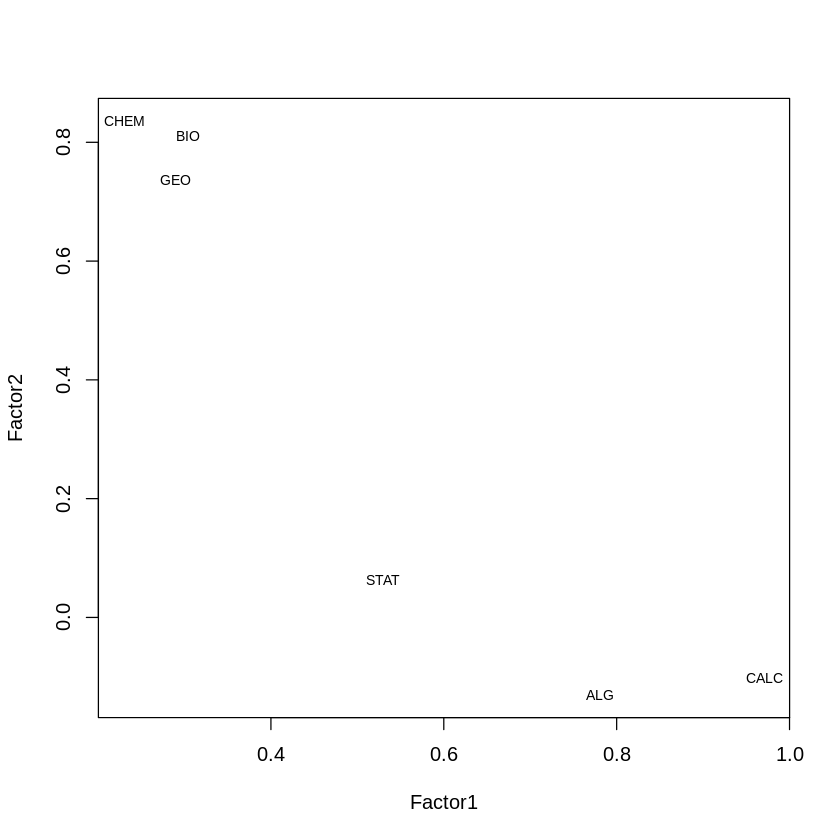

In [32]:
# plot factor 1 by factor 2 
load <- fit$loadings[,1:2] 
plot(load, type = "n") # Set up plot. type = 'n' tells R not to plot the points. 

text(load, labels = names(subjects_data), cex = 0.7) # text() adds variable names.  cex() controls the font size

The output maximizes variance for the 1st and subsequent factors, while all are orthogonal to each other.

Rotation serves to make the output more understandable, by seeking so-called “Simple Structure”. 
Simple structure is a pattern of loadings where items load most strongly on one factor, 
and much more weakly onto the other factors. 
In other words, varimax rotation is an orthogonal rotation of the factor axes to maximize the variance of the squared loadings of a factor (column) on all the variables (rows) in a factor matrix, which has the effect of differentiating the original variables by the extracted factor. 
Each factor will tend to have either large or small loadings of any particular variable. 
A varimax solution yields results which make it as easy as possible to identify each variable with a single factor. This is the most common rotation option. 

In [33]:
fit <- factanal(subjects_data, n.factors, rotation="varimax")     # 'varimax' is an ortho rotation

load <- fit$loadings[,] 
load

,Factor1,Factor2
BIO,0.85456336,0.13257053
GEO,0.77932854,0.13455074
CHEM,0.86460737,0.05545425
ALG,0.03133486,0.79070534
CALC,0.09671653,0.97107765
STAT,0.16998499,0.50612151


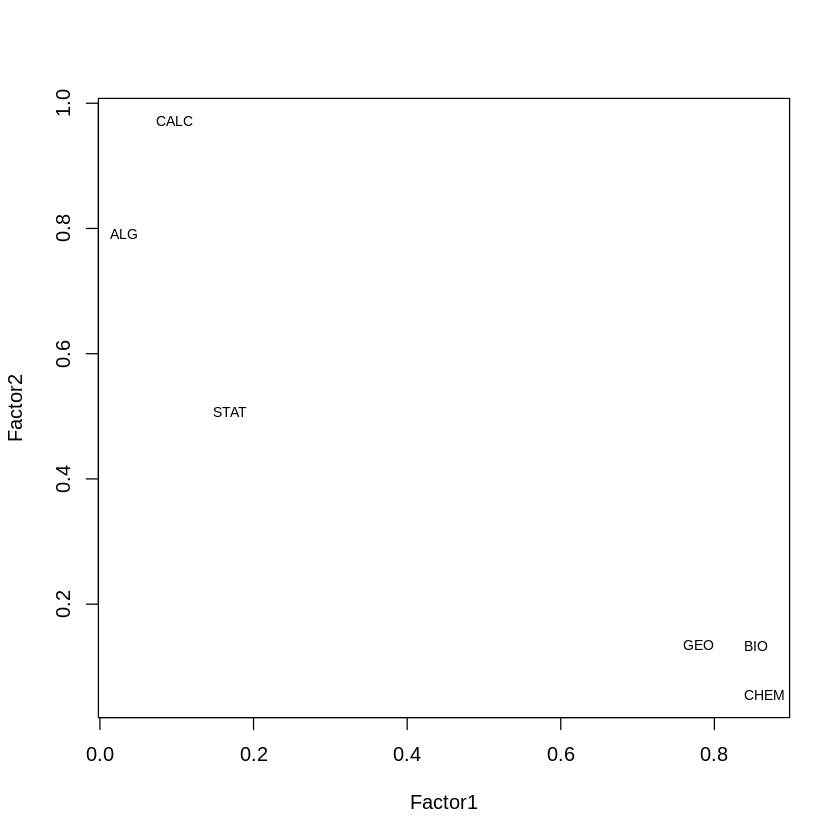

In [34]:
plot(load, type = "n") # Set up plot  
 
text(load,labels = names(subjects_data), cex = .7) # add variable names

Looking at both plots we see that the courses Geology, Biology, and Chemistry all have high factor loadings around 0.8 on the first factor (PA1) while Calculus, Algebra, and Statistics load highly on the second factor (PA2). 

Note that STAT has a much lower loading on PA2 than ALG or CALC and that it has a slight loading on factor PA1. 
This suggests that statistics is less related to the concept of Math than Algebra and Calculus. 
Just below the loadings table, we can see that each factor accounted for around 30% of the variance in responses, 
leading to a factor solution that accounted for 66% of the total variance in students’ subject matter preference.
